<a href="https://colab.research.google.com/github/MailenGonzalez/PDI_UNS/blob/main/TP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Práctico 4
*Realizado por Mailen Gonzalez*



*   Generar una función que como parámetro de entrada tome la luminacia de una imagen y un numero entero de contadores y como salida obtengamos el histograma respectivo. (la función debe ser desarrollada por ustedes no mediante funciones de librería que ya la implementen). 
*   Buscar dos imágenes con problemas de iluminación (una oscura y otra muy brillante, como las mostradas en las filminas de la clase Pag. 7). Verificar la premisa de que al multiplicar la luminancia por un valor alfa, el problema de iluminación no se corrige. Mostrar la imagen original, la resultante y sus respectivos histogramas, para un valor alfa dado.
*   Implementar las funciones: Lineal a trozos para un valor Y_min y Y_max como parámetros de la función, raíz cuadrada y potencia cuadrática. Para estas usar las imágenes anteriores y mostrar cómo cambio la imagen y el histograma después de aplicar el filtro a la imagen.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread

In [2]:
#Levanta una imagen dada  
def getImage(path):
  image = imread(path)
  return image

#Retorna los canales r g y b de una imagen  
def getRGB(img):
  r = img[:,:,0]
  g = img[:,:,1]
  b = img[:,:,2]
  return r,g,b

#Construir Imagen a partir de sus componentes RGB
def to_image(r,g,b):
  shape = r.shape
  img = np.zeros((shape[0], shape[1], 3))
  img[:,:,0] = r
  img[:,:,1] = g
  img[:,:,2] = b
  return img.astype(np.uint8)

#Normaliza imagenes entre 0 y 1
def normalize(img):
  return img/255.0

def denormalize(img):
  denorm = np.uint8(img*255)
  return np.clip(denorm,0,255)

#convierte la imagen a una matriz numpy
def imageToArray(img):
  return np.array(img)

#Transforma de RGB a YIQ
def toYIQ(img):
  yiq_matrix = np.array([[0.299, 0.587, 0.114],[ 0.595716, -0.274453, -0.321263],[0.211456, -0.522591, 0.311135]])
  yiq_matrix = np.dot(img, yiq_matrix.T)
  return np.clip(yiq_matrix, a_min=np.array([0,-0.5956,-0.5225]), a_max=np.array([1,0.5956,0.5225]))

#convierte una imagen de YIQ a RGB
def toRGB(img):
  rgb_matrix = np.array([[1, 0.9663, 0.6210],[ 1, -0.2721, -0.6474],[1, -1.1070, 1.7046]])
  rgb_matrix = np.dot(img, rgb_matrix.T)    
  return np.clip(rgb_matrix,0,1)

#grafica una imagen
def plotImage(img,title):
  plt.title(title)
  plt.imshow(img)

#graficamoslas imagenes
def plotImages(img1, img2, resultImg):
  fig, axes = plt.subplots(1, 3, figsize=(20, 20))
  ax = axes.ravel()
  ax[0].imshow(img1)
  ax[0].set_title("Image 1")
  ax[1].imshow(img2)
  ax[1].set_title("Image 2")
  ax[2].imshow(resultImg)
  ax[2].set_title("Result Image")
  fig.tight_layout()
  plt.show()

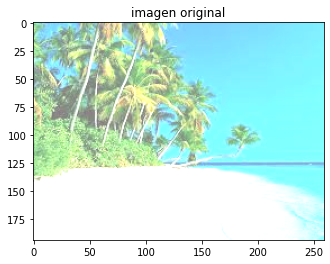

In [3]:
#@title Selecccione una Imagen. { run: "auto" }

Nature = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRHJbh63G7GRoh7rTSo9vi5YaDOtdrhHwhIYg&usqp=CAU'
Nature_oscura = 'https://github.com/MailenGonzalez/PDI_UNS/blob/main/NATURE1.png?raw=true'
Nature_quemada = 'https://github.com/MailenGonzalez/PDI_UNS/blob/main/NATURE2.png?raw=true'
image = 'Nature_quemada' #@param ["Nature", "Nature_oscura", "Nature_quemada"]

if image == 'Nature':
  img = getImage(Nature)
  plotImage(img,'imagen original')
elif image == 'Nature_quemada':
  img= getImage(Nature_quemada)
  plotImage(img,'imagen original')
elif image == 'Nature_oscura':
  img= getImage(Nature_oscura)
  plotImage(img,'imagen original')
  
img_original = np.copy(img)
img = img.astype('float')


In [22]:
def getHistograma(img_yiq, bins):
  luminancia = img_yiq[:,:,0]
  luminancia = luminancia.flatten()
  histogram = np.zeros(bins)
  for y in luminancia:
    bin = np.int(np.floor(y * bins))
    if (bin < bins):
      histogram[bin] +=1
    else:
      histogram[bins-1] +=1  
  return histogram.astype(int)

def plotHistogram(hist, bins):
  fig, ax = plt.subplots()
  x = 1 / bins
  x_axis = np.linspace(0, 1, bins + 1)
  ax.bar(x_axis[:-1] + x / 2, hist, width=x, edgecolor='k')
  ax.set_ylabel('Frequency')
  ax.set_xlabel('Luminance')
  plt.show()

def imgxalpha(alpha, img_yiq):
    img = np.copy(img_yiq)
    img[:,:,0] = np.clip((img[:,:,0] * alpha),0.0,1.0)
    return img.astype('float')

def lineal_a_trozos(img_yiq, y_max, Y_min):
  img = np.copy(img_yiq)

 #calculo la funcion lineal y = ax +b :
  if y_min >0:
    a = (1-y_max) / y_min #Pendiente
  else:
    a = 1  
  b = 0 - a * y_min#ordenada

  fil, col, dim = img.shape
  for i in range(fil):
    for j in range(col):
      if img[i,j,0] > y_max:
        img[i,j,0] = 1
      elif img[i,j,0] < y_min:  
        img[i,j,0] = 0
      else:
        img[i,j,0] = np.clip((a*img[i,j,0] + b), 0.0, 1.0)

  return img.astype('float')

def potencia(img_yiq):
  img = np.copy(img_yiq)
  img[:,:,0] = np.clip((np.power(img[:,:,0], 2)),0.0,1.0)
  return img.astype('float')

def raiz(img_yiq):
  img = np.copy(img_yiq)
  img[:,:,0] = np.clip((np.sqrt(img[:, :, 0])),0.0,1.0)
  return img.astype('float')   

In [5]:
img_norm = normalize(img)
img_yiq = toYIQ(img_norm)


**Se muestra el histograma de la imagen original**

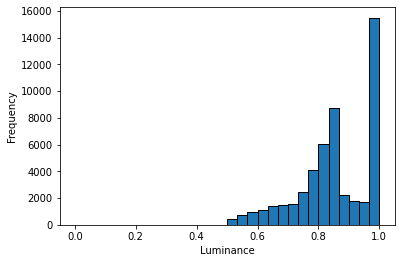

In [6]:
#@title Seleccione la cantidad de bins{ run: "auto" }
#Elegir un valor mayor a 0
bins = 30 #@param {type:"slider", min:0, max:100, step:5} 

histogram = getHistograma(img_yiq,bins)
plotHistogram(histogram, bins)

**Método para multiplicar una imagen por alpha**

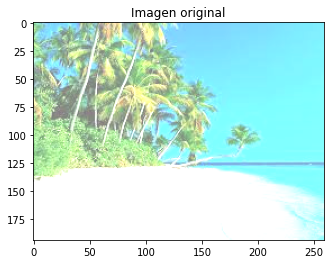

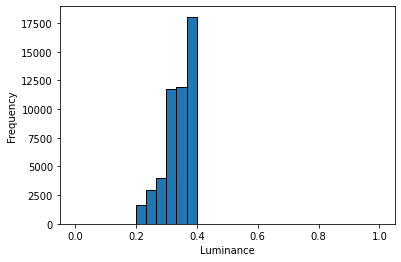

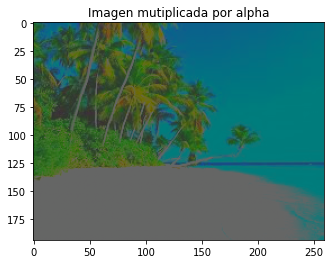

In [7]:
#@title Seleccione un valor de alpha{ run: "auto" }
alpha = 0.4 #@param {type:"slider", min:0, max:2, step:0.1} 
plotImage(img_original, 'Imagen original')
img_alpha = imgxalpha(alpha, img_yiq)
hist_alpha = getHistograma(img_alpha,bins)
plotHistogram(hist_alpha,bins)
img_rgb = toRGB(img_alpha)
plotImage(img_rgb, 'Imagen mutiplicada por alpha')


**Método para realizar la funcion por trozos**

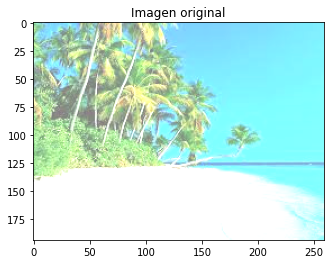

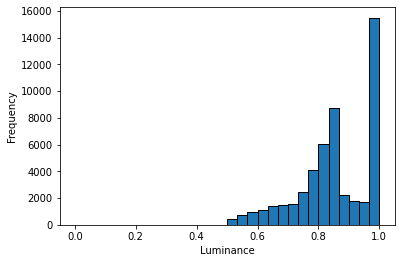

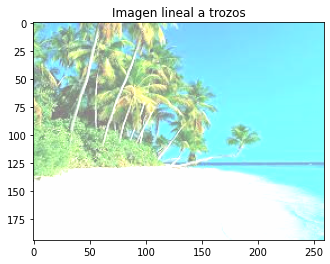

In [23]:
#@title Seleccione un valor para funcion a trozos{ run: "auto" }
y_min = 0 #@param {type:"slider", min:0, max:1, step:0.1} 
y_max = 1 #@param {type:"slider", min:0, max:1, step:0.1} 

plotImage(img_original, 'Imagen original')
img_lineal = lineal_a_trozos(img_yiq, y_max, y_min)
hist_lineal = getHistograma(img_lineal,bins)
plotHistogram(hist_lineal,bins)
img_rgb = toRGB(img_lineal)
plotImage(img_rgb, 'Imagen lineal a trozos')



**Método para realizar la raiz cuadrada y la potencia**

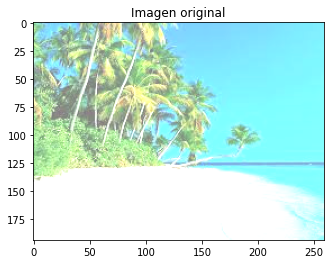

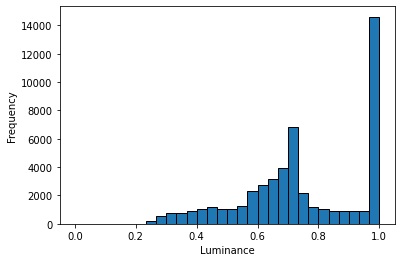

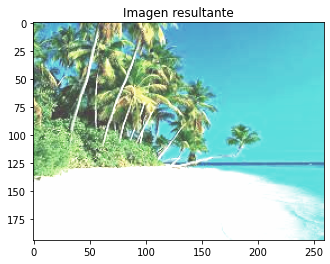

In [29]:
#@title Seleccione una operacion. { run: "auto" }

operacion = 'sqr' #@param ["sqr", "sqrt"]

if operacion == 'sqr':
  result_img = potencia(img_yiq)
elif operacion == 'sqrt':
  result_img = raiz(img_yiq)

plotImage(img_original, 'Imagen original')
hist_lineal = getHistograma(result_img,bins)
plotHistogram(hist_lineal,bins)
img_rgb = toRGB(result_img)
plotImage(img_rgb, 'Imagen resultante')



## Análisis de resultados

En todos las operaciones podemos ver como el histograma se modifica. 
Para el caso de la imagen oscura, al multiplicar por un valor de alpha mayor a 1, vemos como la imagen se ilumina pero igualmente no es una buena solución ya que no arregla el problema de luminancia ya que se modifica por igual todos los pixeles, es decir el histograma se mueve pero no se modifica.
En el caso de la lineal a trozos, lo que hace es juntar el histograma en aquellos valores frontera que definimos para aumentar o disminuir la luminancia en aquellos rangos deseados. Si bien en estos casos la imagen mejora un poco respecto de la operacion anterior, no se alcanza la imagen objetivo.

En el caso de raiz cuadrada o potencia, vemos que es la mejor solución para los problemas donde la luminancia es muy alta o muy baja, ya que aplicar dicha funcion mejora la imagen. 

